In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset using pandas dataframe
crop_p = pd.read_csv('/content/Crop Production data.csv')

In [ ]:
crop_p.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
crop_p.shape

(246091, 7)

In [ ]:
# basic information about the data
crop_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
crop_p.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
#density of the data
crop_p.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.00,88.0,729.0,7023.0,1.250800e+09


In [ ]:
# Datatypes of the data
crop_p.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

## Null-value Handling:

In [ ]:
# count of missing value
crop_p.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

## State_Name

In [ ]:
crop_p.State_Name.value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

In [ ]:
crop_p.State_Name.isnull().sum()

# **Production**

In [ ]:
crop_p.Production.isnull().sum()

3730

In [ ]:
crop_p["Production"].fillna(crop_p["Production"].value_counts().sort_values(ascending=False).keys()[0], inplace=True)

In [ ]:
crop_p.Production.isnull().sum()

0

## **District_Name**

In [ ]:
crop_p.District_Name.value_counts().sort_values(ascending=False)

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

In [ ]:
crop_p[crop_p['District_Name'].isnull()].sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area             0.0
Production       0.0
dtype: object

In [ ]:
crop_p.Crop_Year.isnull().sum()

0

# **Season**

In [ ]:
crop_p.Season.value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

In [ ]:
crop_p["Season"].value_counts().sort_values(ascending=False).keys()[0]

'Kharif     '

In [ ]:
crop_p["Season"] = crop_p["Season"].fillna(crop_p["Season"].value_counts().sort_values(ascending=False).keys()[0])

In [ ]:
crop_p.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# **Crop**

In [ ]:
crop_p.Crop.value_counts()

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [ ]:
crop_p[crop_p["Crop"].isnull()].sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area             0.0
Production       0.0
dtype: object

## **Area**

In [ ]:
crop_p.Area.mean()

12002.82086370489

In [ ]:
crop_p[crop_p.Area.isnull()].sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area             0.0
Production       0.0
dtype: object

In [ ]:
crop_p.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### **Detect the handle the outlier**

In [ ]:
crop_p.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,246091.0,573674.455780,1.693614e+07,0.00,77.0,691.0,6769.0,1.250800e+09




*   by looking at the difference between the mean and medianof the data , we conclude that the data has outlier.
*   remove the outlier one by one



# **Area**

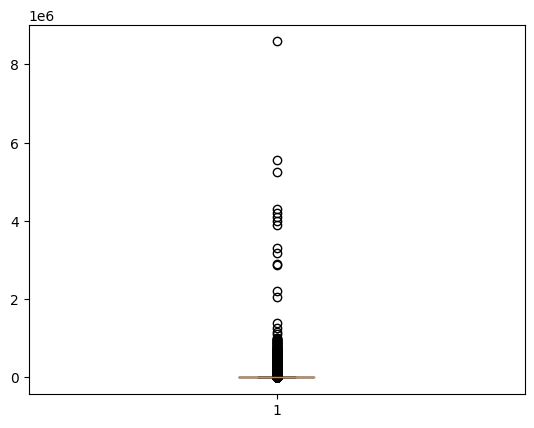

In [ ]:
plot=plt.boxplot(crop_p['Area'])

In [ ]:
q1=np.percentile(crop_p['Area'],25)
q3=np.percentile(crop_p['Area'],75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [ ]:
q1

80.0

In [ ]:
q3

4392.0

In [ ]:
iqr

4312.0

In [ ]:
(lower_bound , upper_bound)

(-6388.0, 10860.0)

In [ ]:
crop1 = pd.DataFrame(crop_p[(crop_p['Area'] >= lower_bound) & (crop_p['Area'] <= upper_bound)])

In [ ]:
crop1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
crop1.shape

(205386, 7)

# **Production**

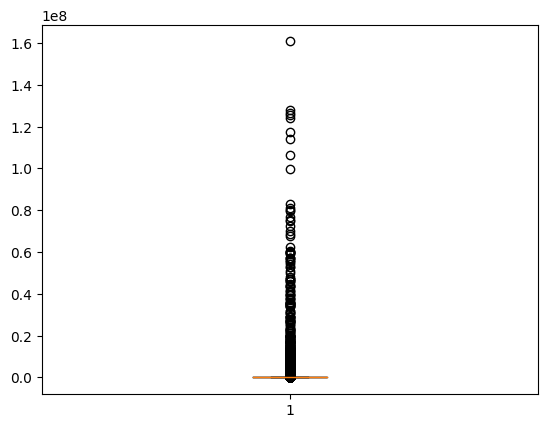

In [ ]:
plot1=plt.boxplot(crop1["Production"])

In [ ]:
q1=np.percentile(crop1['Production'],25)
q3=np.percentile(crop1['Production'],75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [ ]:
q1

46.0

In [ ]:
q3

2054.0

In [ ]:
iqr

2008.0

In [ ]:
(lower , upper)

(-2966.0, 5066.0)

In [ ]:
crop2 = pd.DataFrame(crop1[(crop1['Production'] >= lower) & (crop1['Production'] <= upper)])

In [ ]:
crop2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
crop2.shape

(176013, 7)



*   the dataframe 'crop2'is the new dataframe after removing the outlier
*   will perfome the analysis on this new dataframe(crop2)



In [ ]:
crop2.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
crop2.Crop_Year.nunique()

19



*   the column Crop_year is a categorical columns as it has only 19 unique values
*   i will change the datatype into "object"



In [ ]:
crop2.Crop_Year = crop2.Crop_Year.astype("object")

In [ ]:
crop2.Crop_Year.dtypes

dtype('O')

In [ ]:
# check for the duplicated in the dataset
crop2.duplicated().sum()

0

In [ ]:
# let divide the categorical and numerical columns
num_crop = crop2.select_dtypes(np.number)
cut_crop = crop2.select_dtypes(include='object')

In [ ]:
num_crop.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [ ]:
cut_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut


Visualize all columns at a time (numerical and categorical columns)



#    **CATEGORICAL COLUMNS**





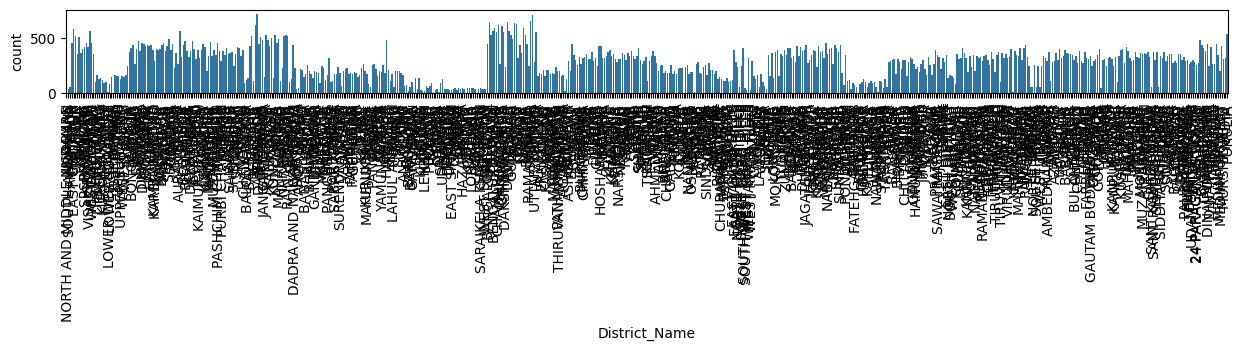

In [ ]:
plt.figure(figsize=(15,5))
num = 1
for i in cut_crop.columns:
  if i != "District_Name":
    plt.subplot(4,1,num)
sns.countplot(data= crop2, x='District_Name')
plt.xticks(rotation=90)
num = num + 1
plt.show()

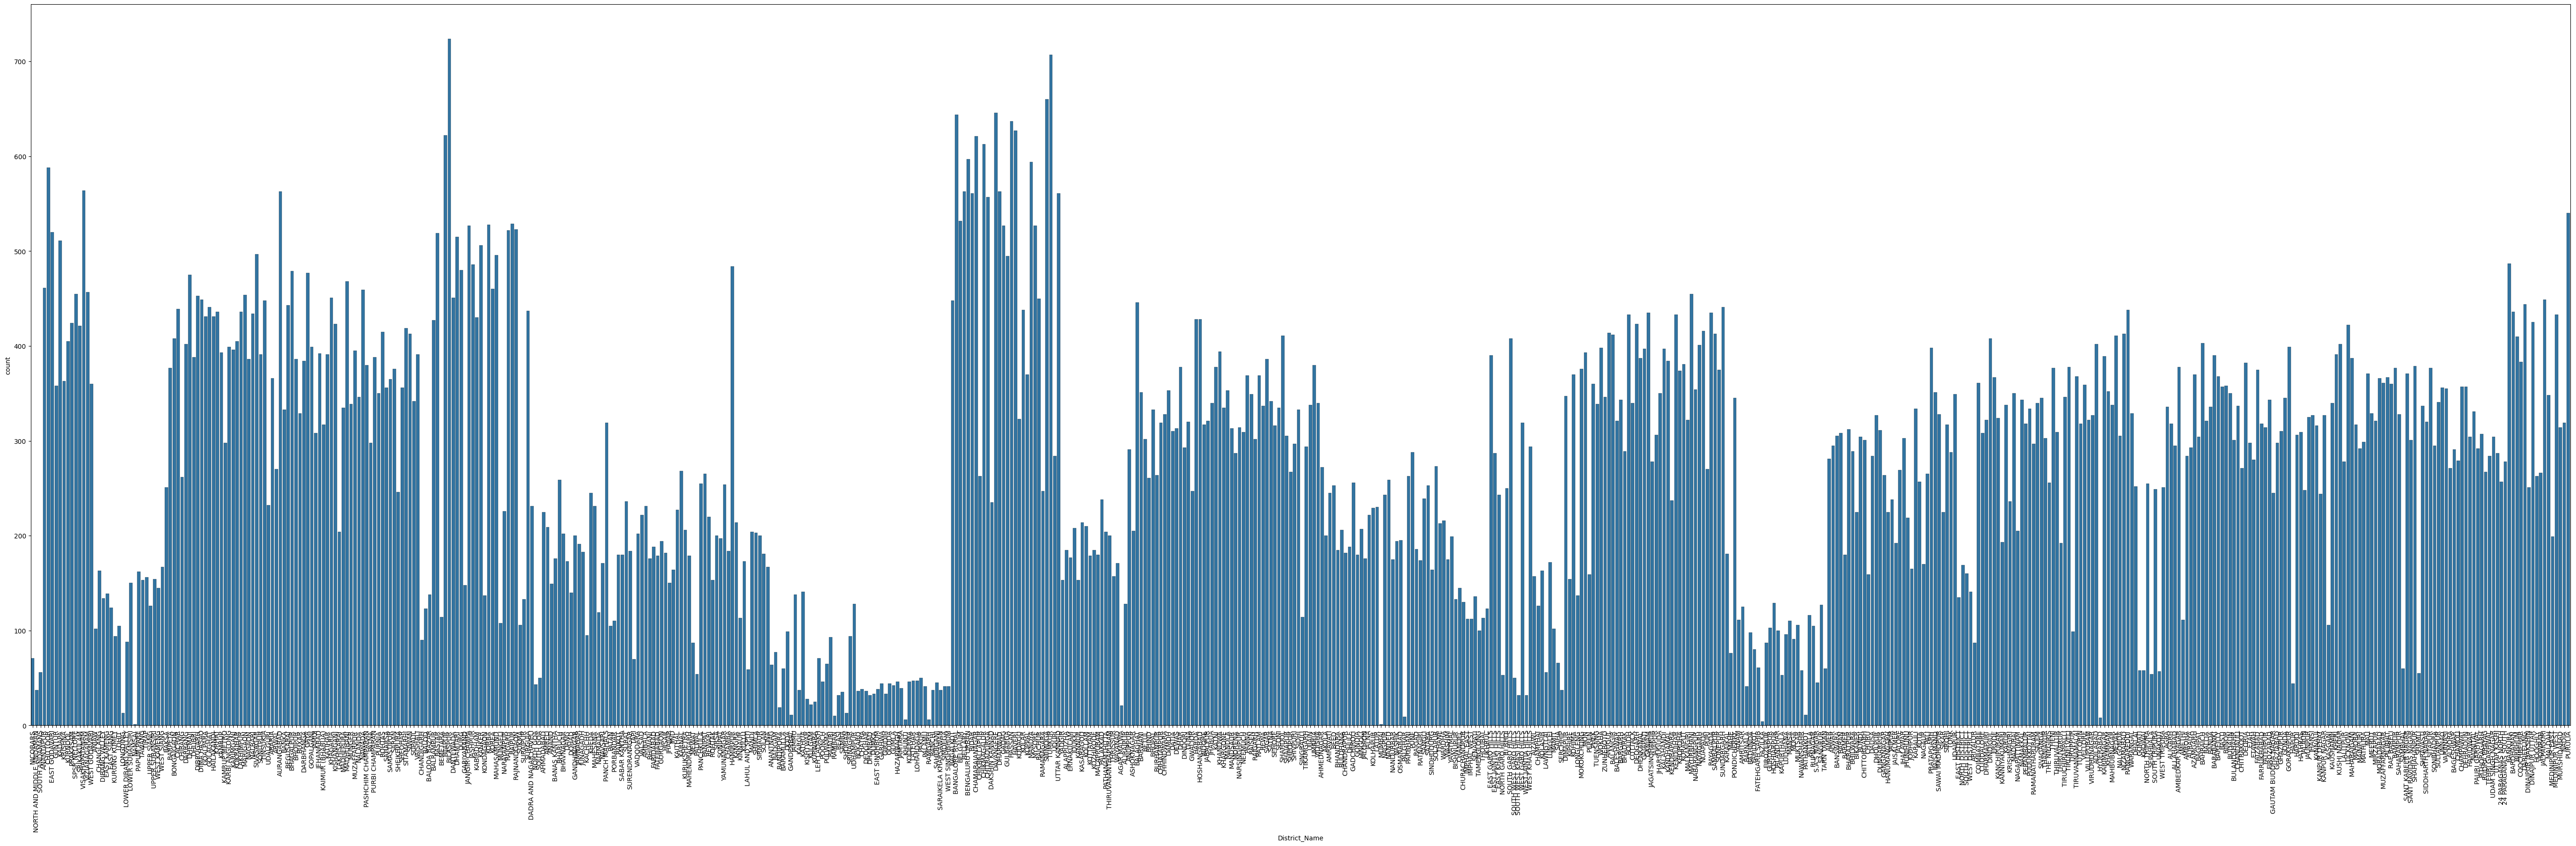

In [ ]:
plt.figure(figsize = (70,20))

sns.countplot(data = cut_crop, x = "District_Name",edgecolor = "k",linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()

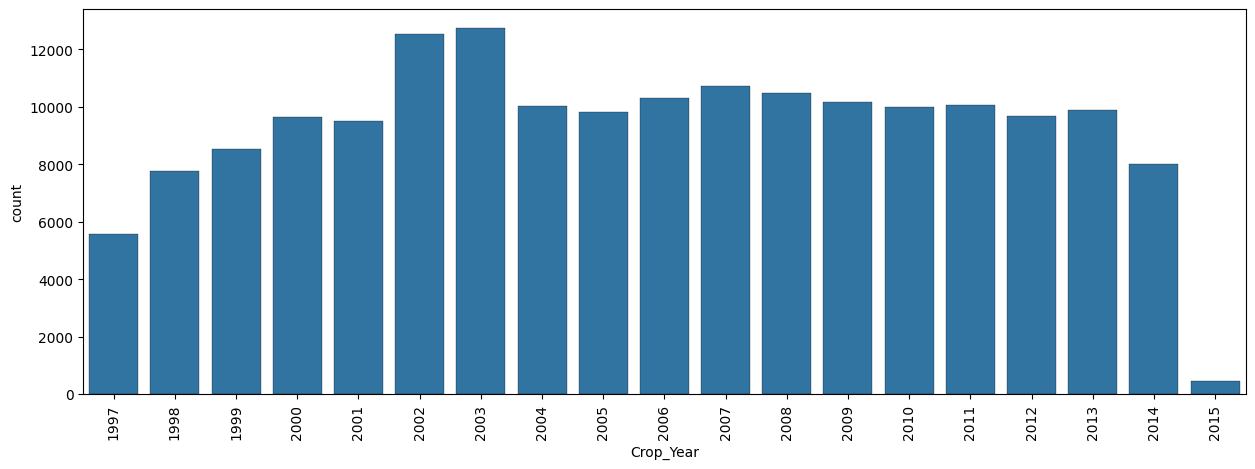

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(data = cut_crop, x = "Crop_Year",edgecolor = "k",linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()

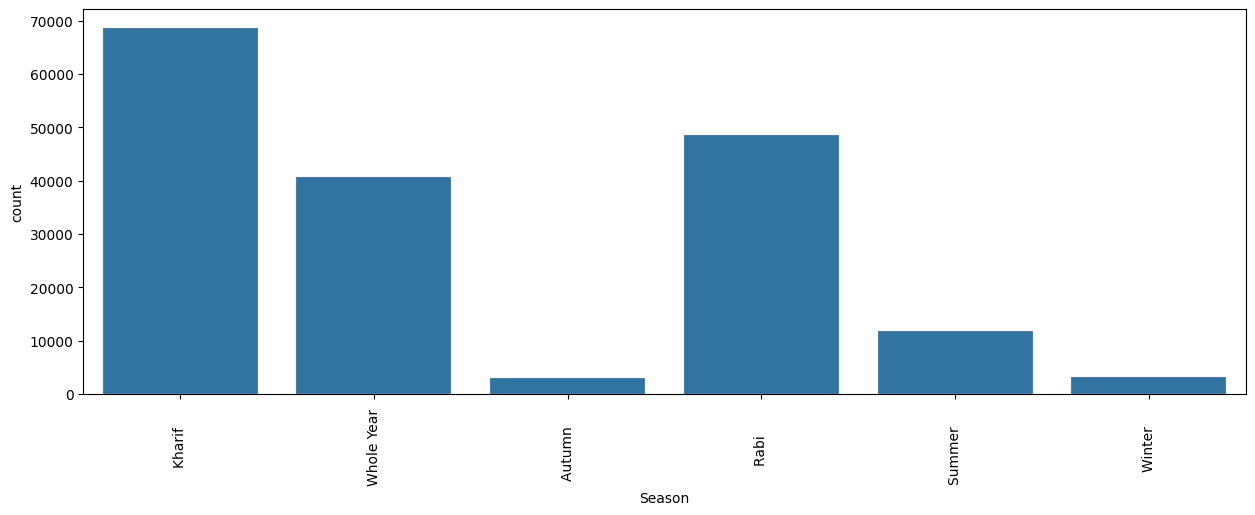

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(data = cut_crop, x = "Season",edgecolor = "pink",linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()

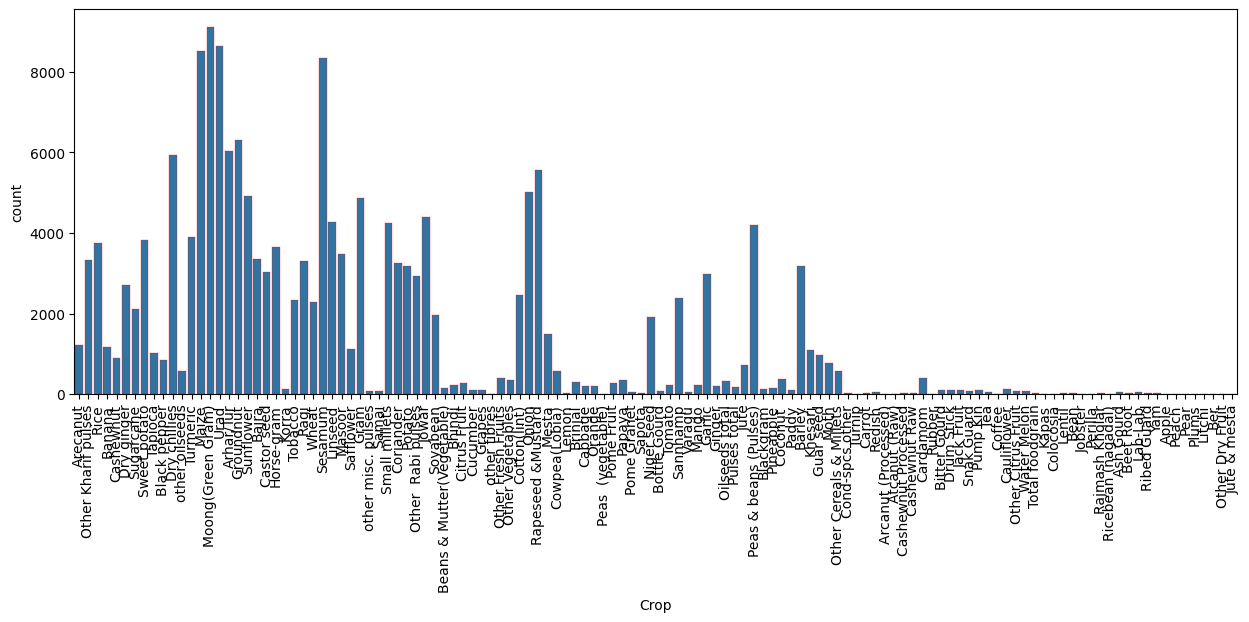

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(data = cut_crop, x = "Crop",edgecolor = "red",linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()

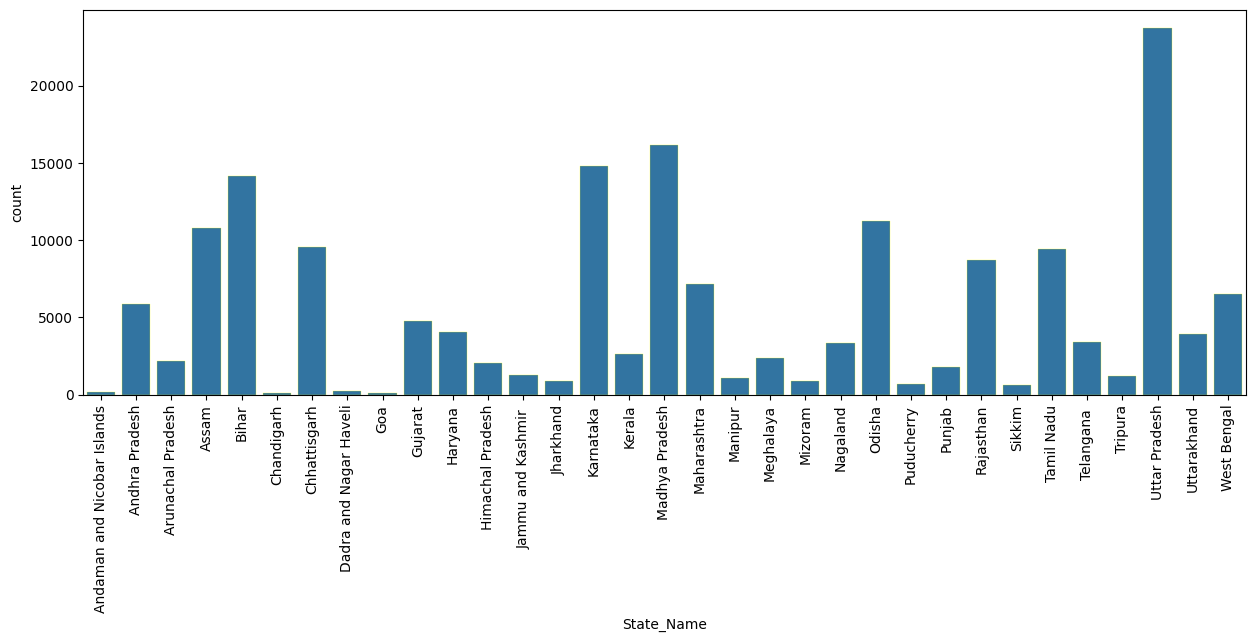

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(data = cut_crop, x = "State_Name",edgecolor = "yellow",linewidth = 0.2)
plt.xticks(rotation = 90)
plt.show()

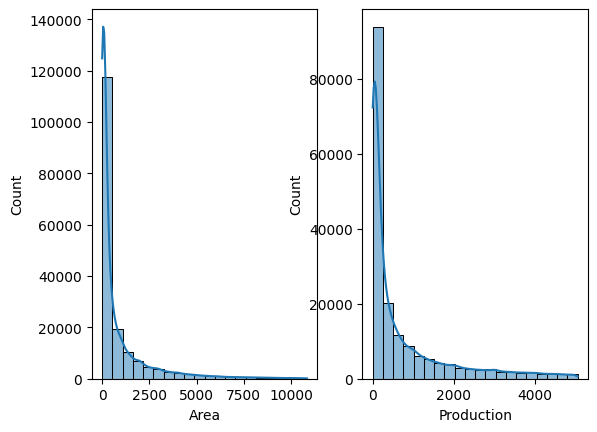

In [ ]:
plt.figsize = (15,5)
plt.subplot(1,2,1)
sns.histplot(data = num_crop, x = "Area", kde = True, bins = 20)
plt.subplot(1,2,2)
sns.histplot(data = num_crop, x = "Production", kde = True, bins = 20)
plt.show()



*   The numerical columns-data is highly skeweed even after removing the outlier
*   this two columns are important for our analysis




# **Univarate Analysis**

In [ ]:
crop2.State_Name.value_counts()

State_Name
Uttar Pradesh                  23727
Madhya Pradesh                 16164
Karnataka                      14828
Bihar                          14124
Odisha                         11216
Assam                          10812
Chhattisgarh                    9536
Tamil Nadu                      9430
Rajasthan                       8712
Maharashtra                     7178
West Bengal                     6502
Andhra Pradesh                  5887
Gujarat                         4776
Haryana                         4029
Uttarakhand                     3931
Telangana                       3385
Nagaland                        3379
Kerala                          2661
Meghalaya                       2358
Arunachal Pradesh               2176
Himachal Pradesh                2070
Punjab                          1806
Jammu and Kashmir               1308
Tripura                         1234
Manipur                         1104
Jharkhand                        905
Mizoram                    

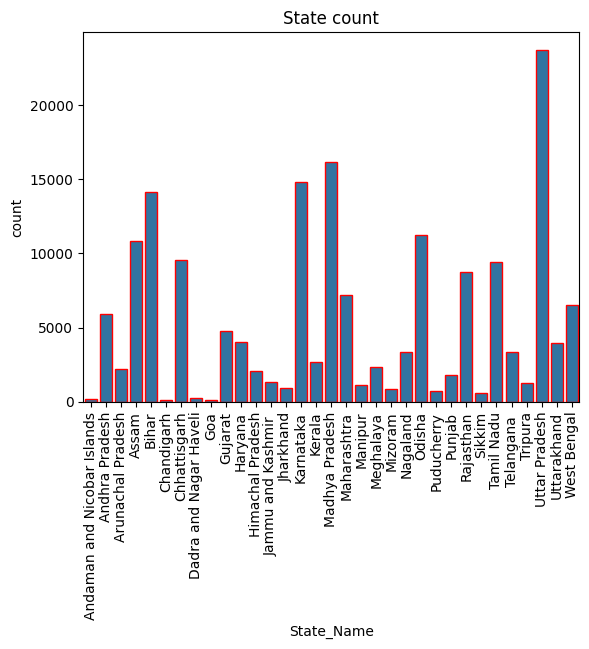

In [ ]:
plt.figsize = (15,5)
sns.countplot(data = crop2, x = "State_Name",edgecolor = "red",linewidth = 1)
plt.xticks(rotation = 90)
plt.title("State count")
plt.show()



*   Uttar Pradesh & Madhay Pradesh as highest count.
*   Goa & Chandigarh as lowest count.



In [ ]:
crop2.District_Name.value_counts()

District_Name
BILASPUR           724
TUMKUR             707
SHIMOGA            660
DAVANGERE          646
BANGALORE RURAL    644
                  ... 
KHUNTI               6
RAMGARH              6
FAZILKA              4
MUMBAI               1
NAMSAI               1
Name: count, Length: 646, dtype: int64

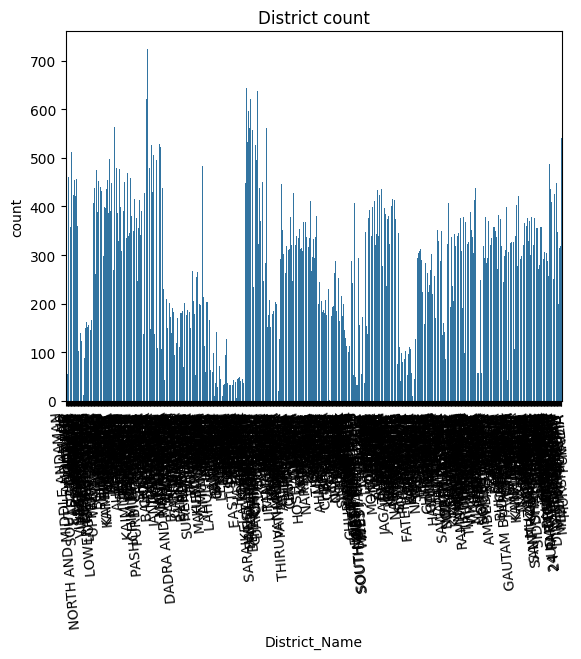

In [ ]:
plt.figsize = (30,20)
sns.countplot(data = crop2, x = "District_Name")
plt.xticks(rotation = 95)
plt.title("District count")
plt.show()



*   the above graph does not gives any clear picture.
*   hence we will look at top 10 and bottom 10 district count.



In [ ]:
count_district = crop2.District_Name.value_counts()
count_district

District_Name
BILASPUR           724
TUMKUR             707
SHIMOGA            660
DAVANGERE          646
BANGALORE RURAL    644
                  ... 
KHUNTI               6
RAMGARH              6
FAZILKA              4
MUMBAI               1
NAMSAI               1
Name: count, Length: 646, dtype: int64

In [ ]:
Top10 = count_district[:11]
Top10

District_Name
BILASPUR           724
TUMKUR             707
SHIMOGA            660
DAVANGERE          646
BANGALORE RURAL    644
HASSAN             637
HAVERI             627
BIJAPUR            622
CHAMARAJANAGAR     621
CHIKMAGALUR        613
BENGALURU URBAN    597
Name: count, dtype: int64

In [ ]:
Bottom10 = count_district[-11:-1]
Bottom10

District_Name
SHOPIAN      13
PATHANKOT    11
GANDERBAL    11
RAMBAN       10
PALGHAR       9
HYDERABAD     8
KHUNTI        6
RAMGARH       6
FAZILKA       4
MUMBAI        1
Name: count, dtype: int64

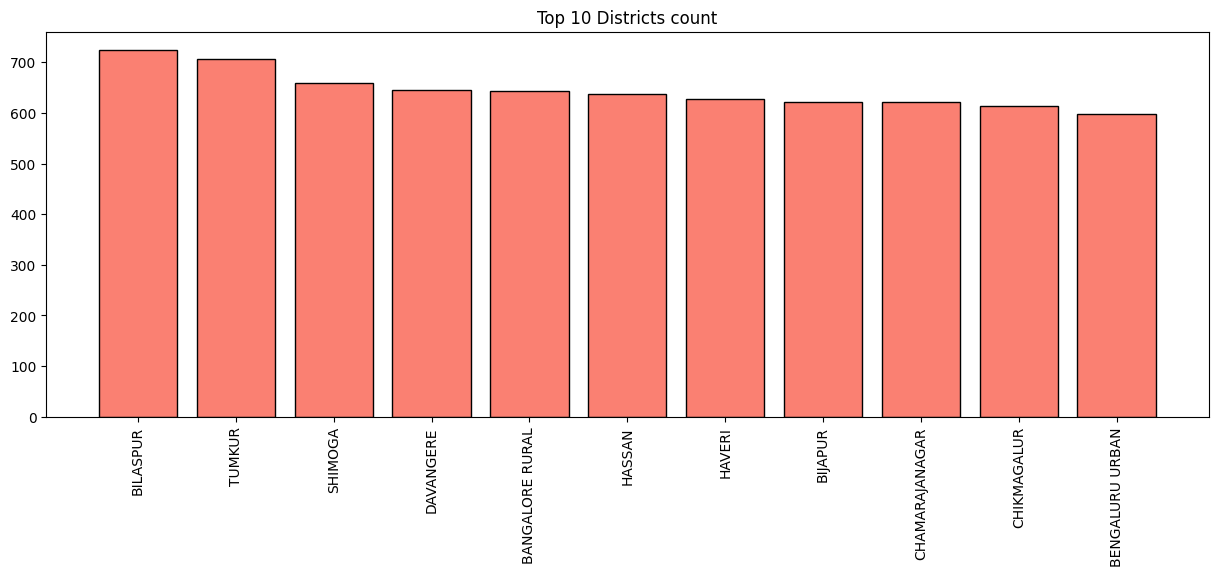

In [ ]:
# Top 10 district :
plt.figure(figsize = (15,5))
plt.bar(Top10.index, Top10.values, color = "salmon", edgecolor = "k")
plt.title("Top 10 Districts count", fontdict={'size': 12})
plt.xticks(rotation = 90)
plt.show()

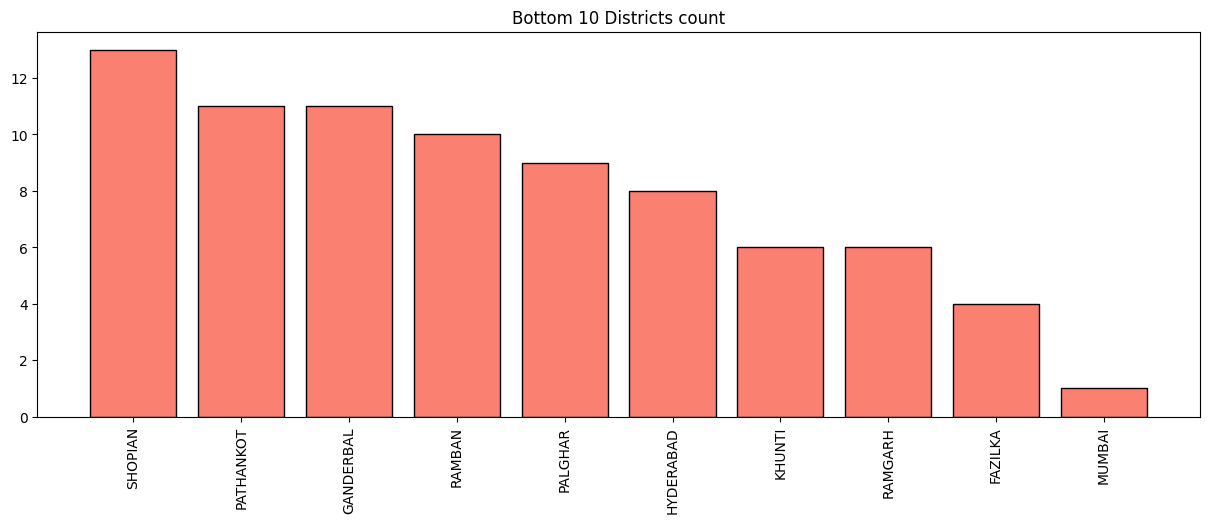

In [ ]:
# Bottom 10 district
plt.figure(figsize = (15,5))
plt.bar(Bottom10.index, Bottom10.values, color = "salmon", edgecolor = "k")
plt.title("Bottom 10 Districts count", fontdict={'size': 12})
plt.xticks(rotation = 90)
plt.show()



*   the District Bilaspur has maximum count, has maximum crop production.
*   the District Mumbai has lowest count, has lowest crop production.



In [ ]:
crop2.Crop_Year.value_counts()

Crop_Year
2003    12763
2002    12526
2007    10718
2008    10470
2006    10307
2009    10164
2011    10079
2004    10043
2010    10002
2013     9879
2005     9840
2012     9676
2000     9658
2001     9513
1999     8544
2014     8020
1998     7760
1997     5586
2015      465
Name: count, dtype: int64

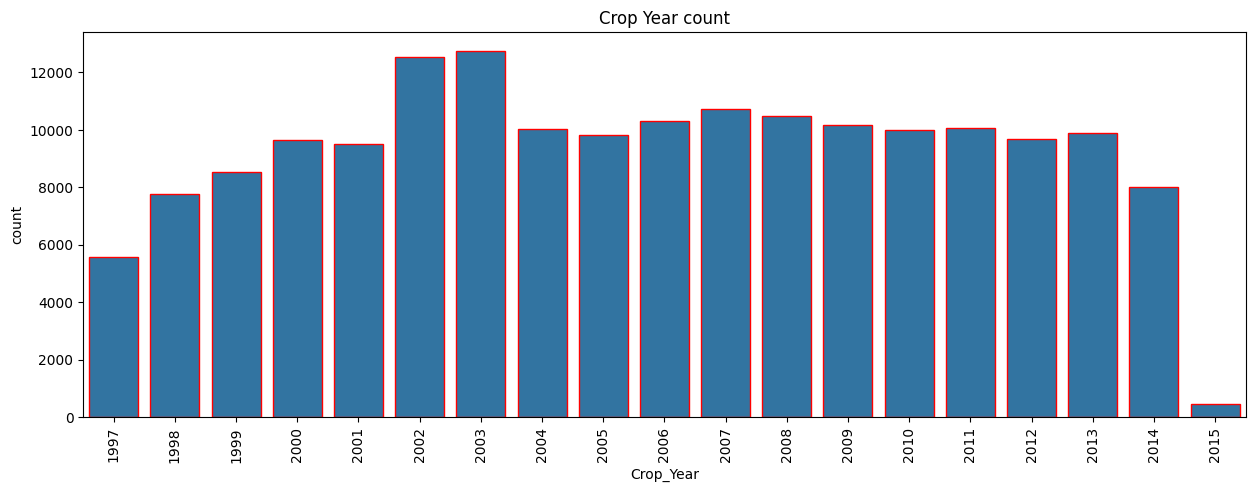

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = crop2, x = "Crop_Year",edgecolor = "red",linewidth = 1)
plt.xticks(rotation = 90)
plt.title("Crop Year count")
plt.show()



*   the year 2002 & 2003 has maximum count.
*   the tear 2015 have lowest count.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

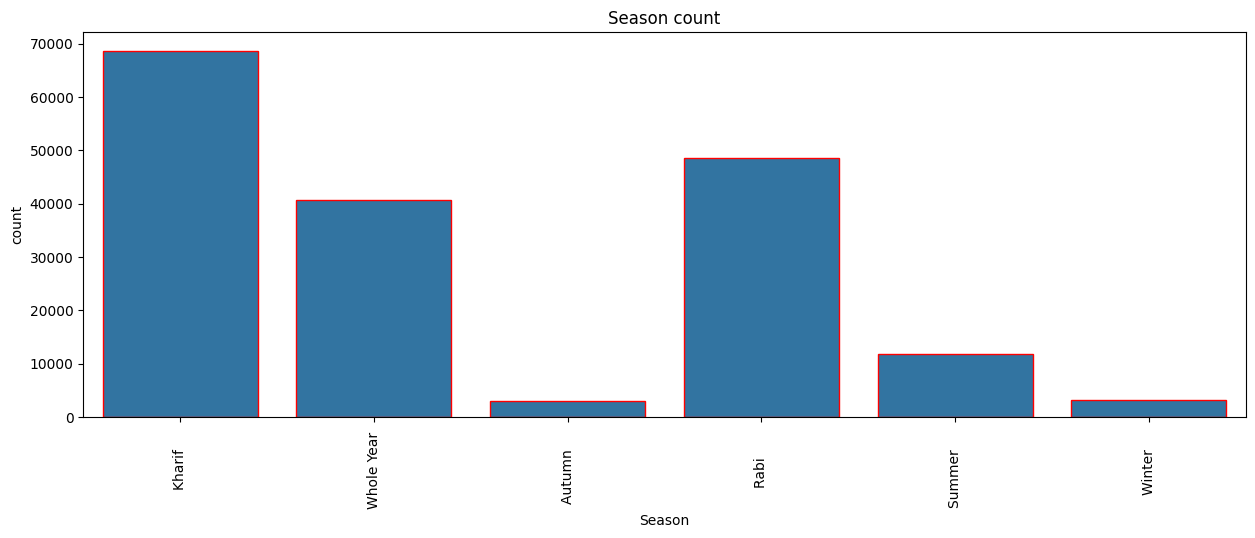

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = crop2, x = "Season",edgecolor = "red",linewidth = 1)
plt.xticks(rotation = 90)
plt.title("Season count")
plt



*   the Kharif season have maximum count.
*   the Autumn season have minimum count.



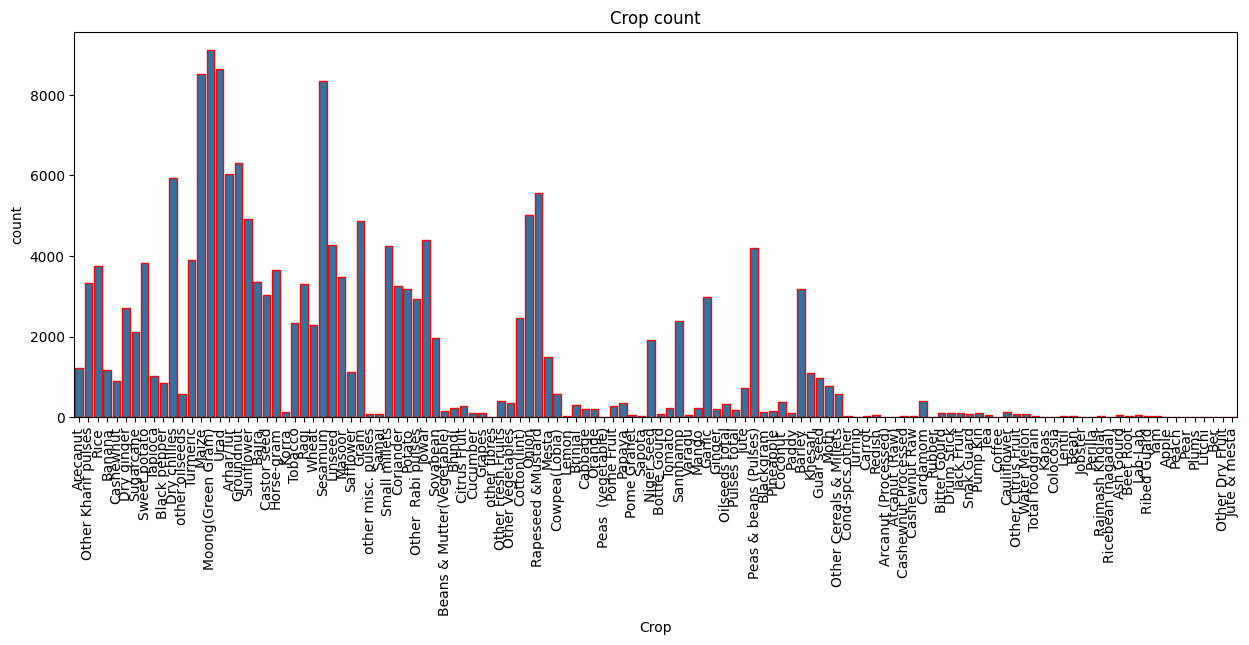

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = crop2, x = "Crop",edgecolor = "red",linewidth = 1)
plt.xticks(rotation = 90)
plt.title("Crop count")
plt.show()



*  Here also not get clear picture , we will find Top 10 & bottom 10

In [ ]:
Top10_crop = crop2.Crop.value_counts()[:11]
Top10_crop

Crop
Moong(Green Gram)    9105
Urad                 8633
Maize                8518
Sesamum              8348
Groundnut            6300
Arhar/Tur            6026
Dry chillies         5925
Rapeseed &Mustard    5573
Onion                5011
Sunflower            4912
Gram                 4866
Name: count, dtype: int64

In [ ]:
Bottom10_crop = crop2.Crop.value_counts()[-11:-1]
Bottom10_crop

Crop
Jute & mesta     8
Colocosia        8
Atcanut (Raw)    8
Pear             6
Plums            6
Litchi           6
Rubber           5
Apple            4
Peach            4
Coffee           2
Name: count, dtype: int64

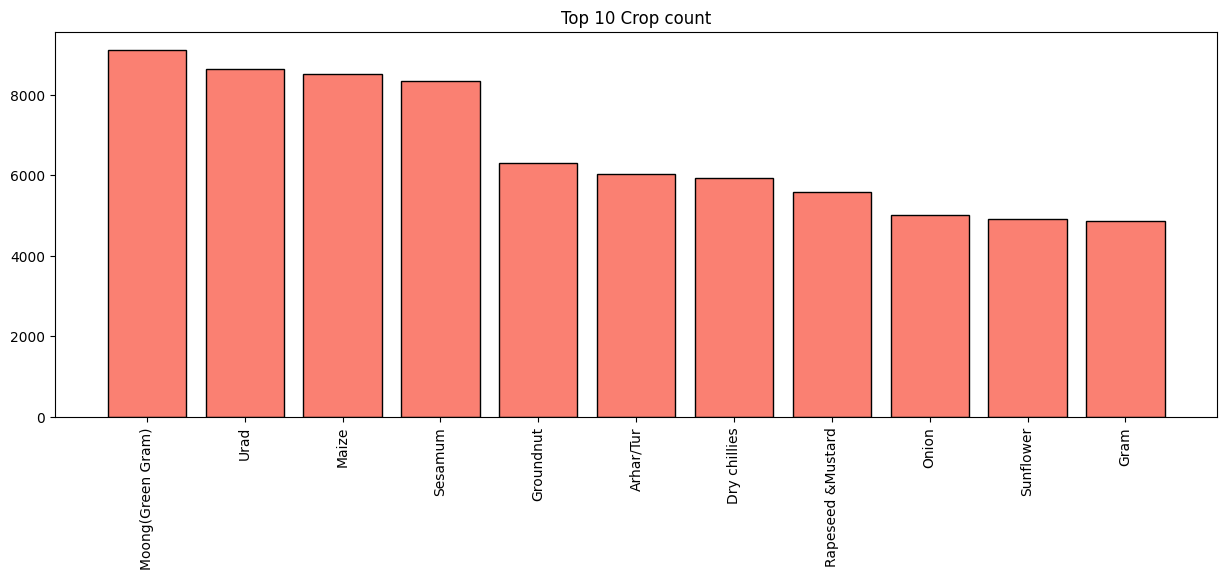

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(Top10_crop.index, Top10_crop.values, color = "salmon", edgecolor = "k")
plt.title("Top 10 Crop count", fontdict={'size': 12})
plt.xticks(rotation = 90)
plt.show()

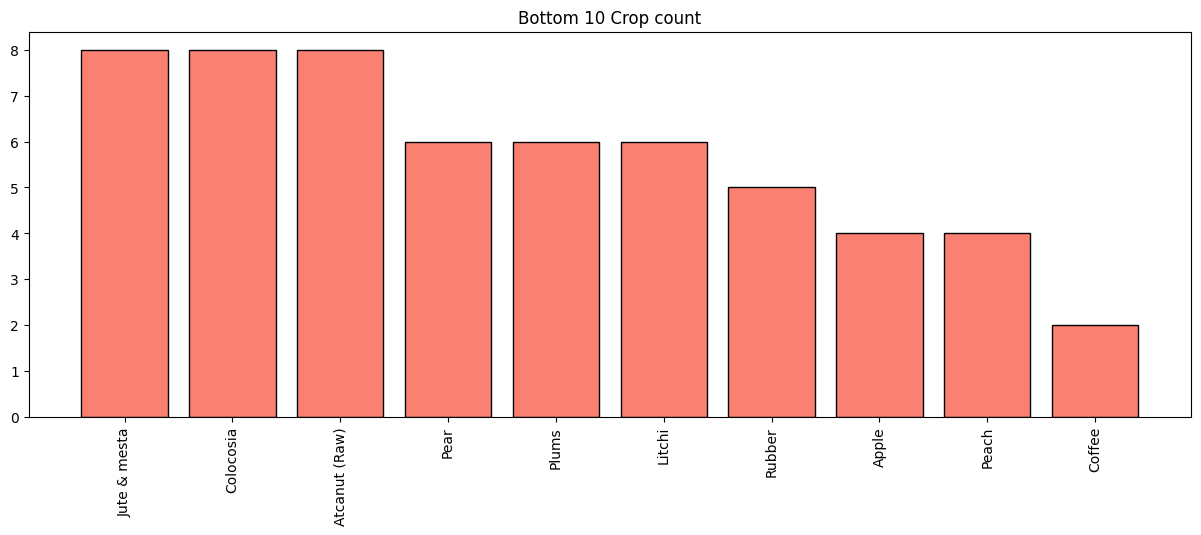

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(Bottom10_crop.index, Bottom10_crop.values, color = "salmon", edgecolor = "k")
plt.title("Bottom 10 Crop count", fontdict={'size': 12})
plt.xticks(rotation = 90)
plt.show()



*   Moong(Green Grams) have maximum count.
*   Coffee have lowest count.



In [ ]:
crop2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# **Area**

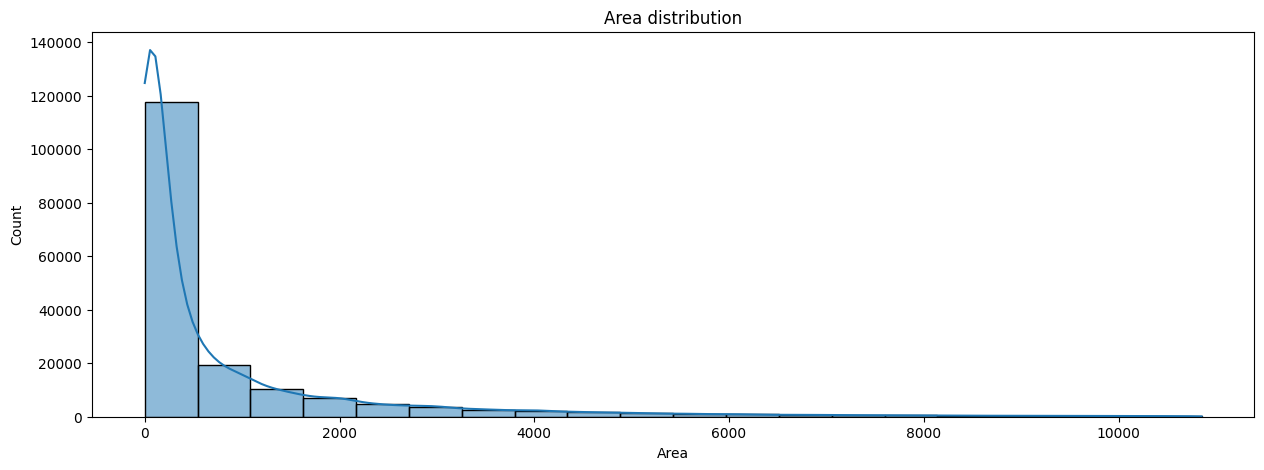

In [ ]:
plt.figure(figsize = (15,5))
sns.histplot(data = crop2, x = "Area", kde = True, bins = 20)
plt.title("Area distribution")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()



*   the data is highly skweed.
*   beacuse every state has varying number of agricultural land.



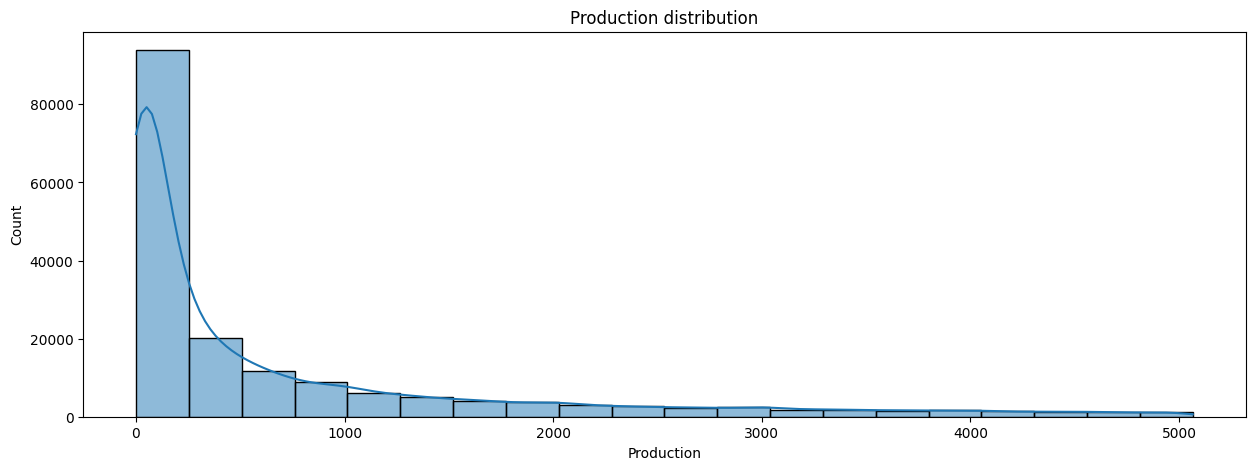

In [ ]:
plt.figure(figsize = (15,5))
sns.histplot(data = crop2, x = "Production", kde = True, bins = 20)
plt.title("Production distribution")
plt.xlabel("Production")
plt.ylabel("Count")
plt.show()



*  the data is highly skweed.
*  every state produce diffrent crops.



# **Bivariate Analysis**

In [ ]:
crop2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


<ipython-input-89-1f985d5547ea>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


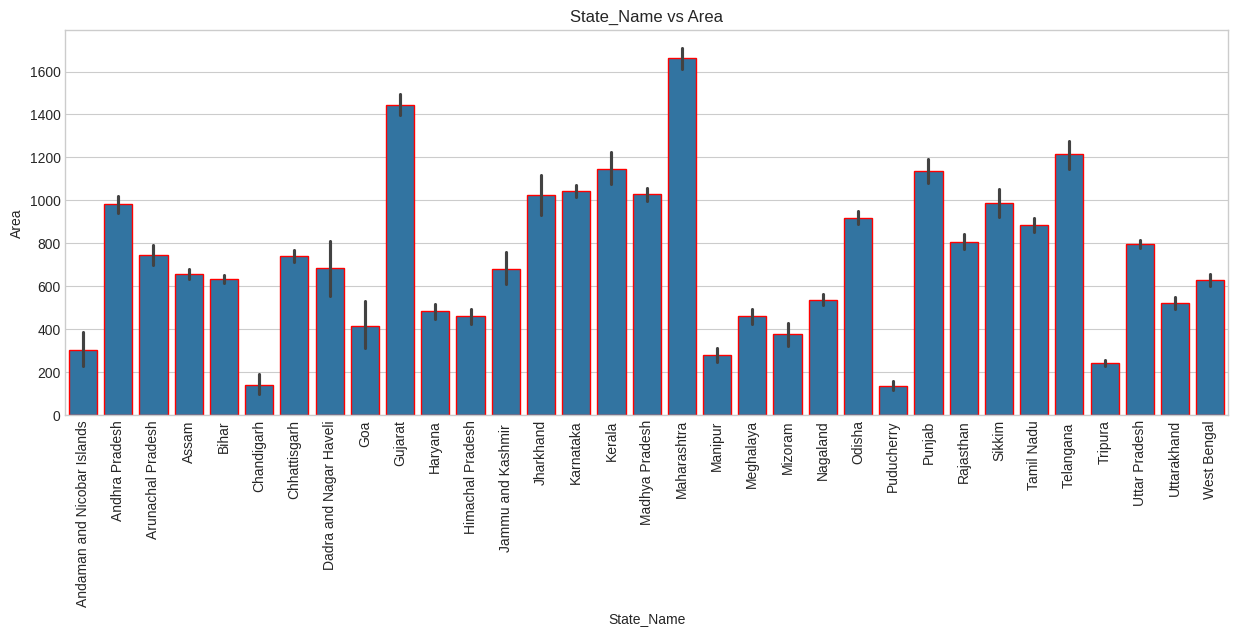

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (15,5))
sns.barplot(data = crop2, x = "State_Name", y = "Area", edgecolor = "red")
plt.title("State_Name vs Area")
plt.xticks(rotation = 90)
plt.show()



*   the states Gujarat,Maharashtra, Telangana has maximum number of agricutural land .
*   chandigarh have lowest number of agricutural land.



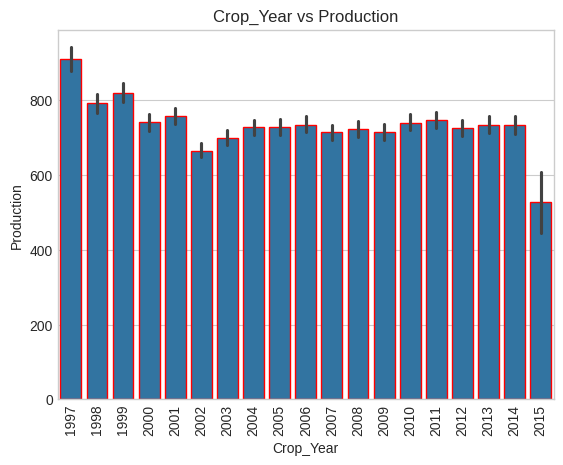

In [ ]:
sns.barplot(data = crop2, x = "Crop_Year", y = "Production", edgecolor = "red")
plt.title("Crop_Year vs Production")
plt.xticks(rotation = 90)
plt.show()



*   Since 1997 there is not any much diffrence in crop production.
*   2015 have lowest crop production.



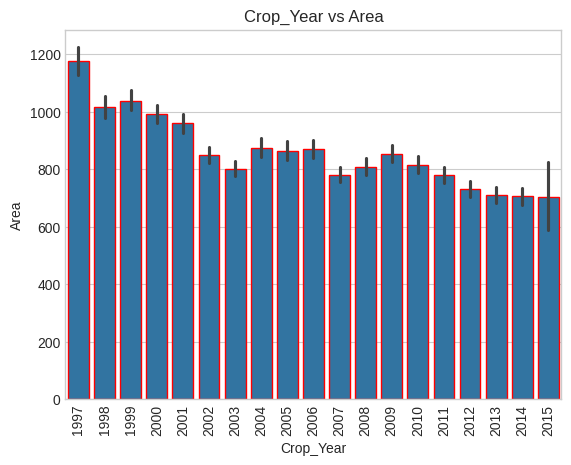

In [ ]:
sns.barplot(data = crop2, x = "Crop_Year", y = "Area", edgecolor = "red")
plt.title("Crop_Year vs Area")
plt.xticks(rotation = 90)
plt.show()



*   from 1997 to 2015 there is a decrease in agricultral area.


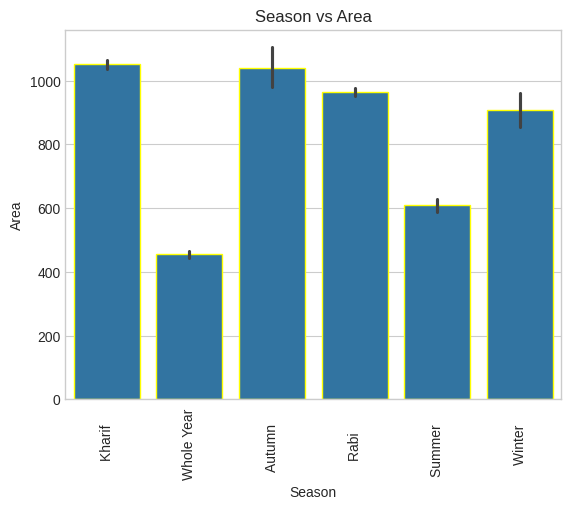

In [ ]:
sns.barplot(data = crop2, x = "Season", y = "Area", edgecolor = "yellow")
plt.title("Season vs Area")
plt.xticks(rotation = 90)
plt.show()



*   the agricultral area is maximum in "Autumn"


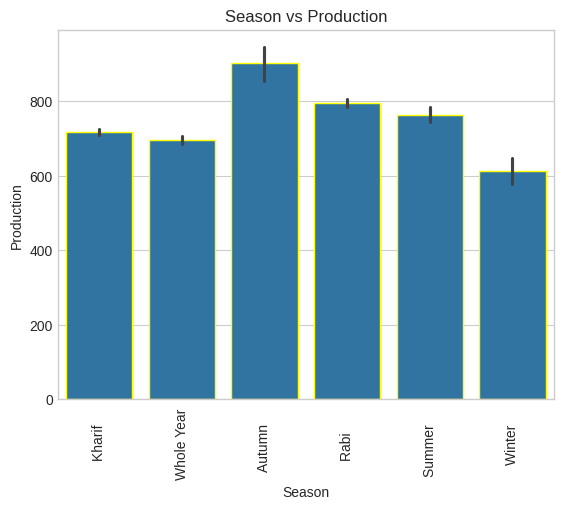

In [ ]:
sns.barplot(data = crop2, x = "Season", y = "Production", edgecolor = "yellow")
plt.title("Season vs Production")
plt.xticks(rotation = 90)
plt.show()



*   the production area is maximum in "Autumn".



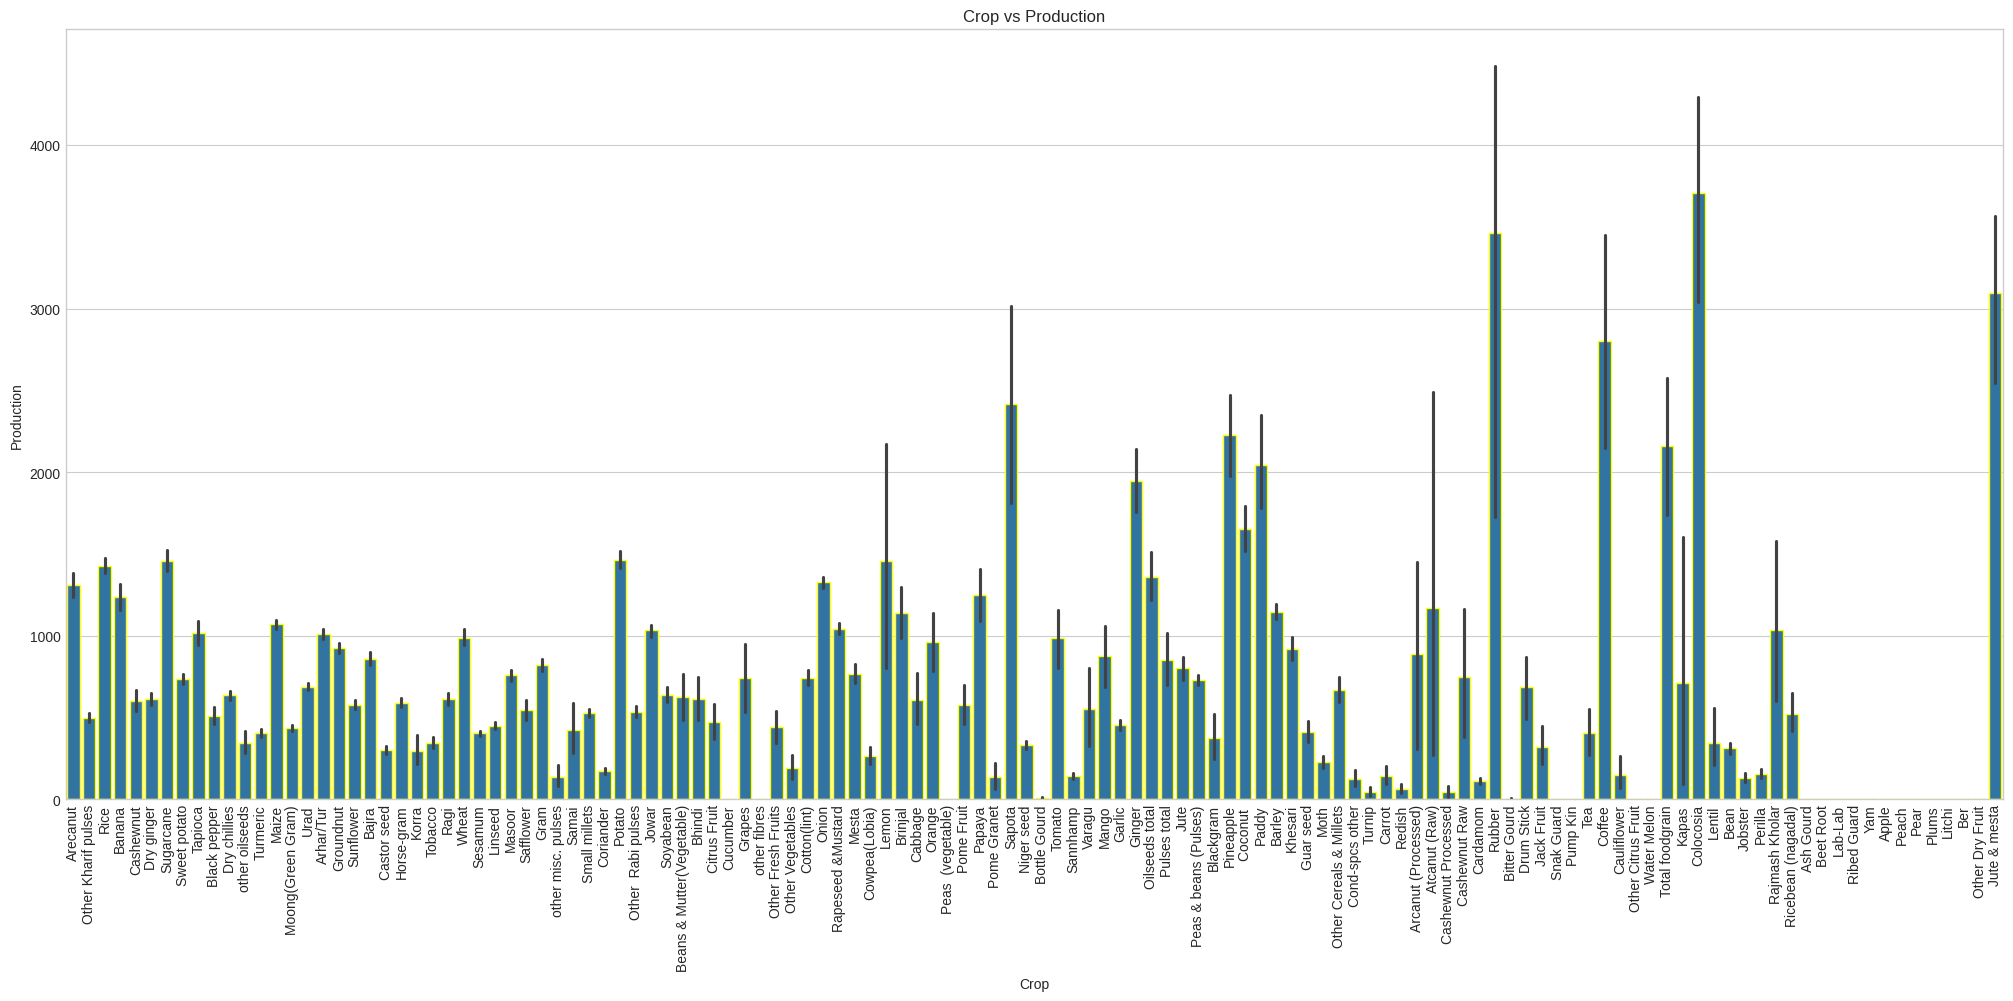

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = crop2, x = "Crop", y = "Production", edgecolor = "yellow")
plt.title("Crop vs Production")
plt.xticks(rotation = 90)
plt.show()



*   the production of colocosia is done in maximum.



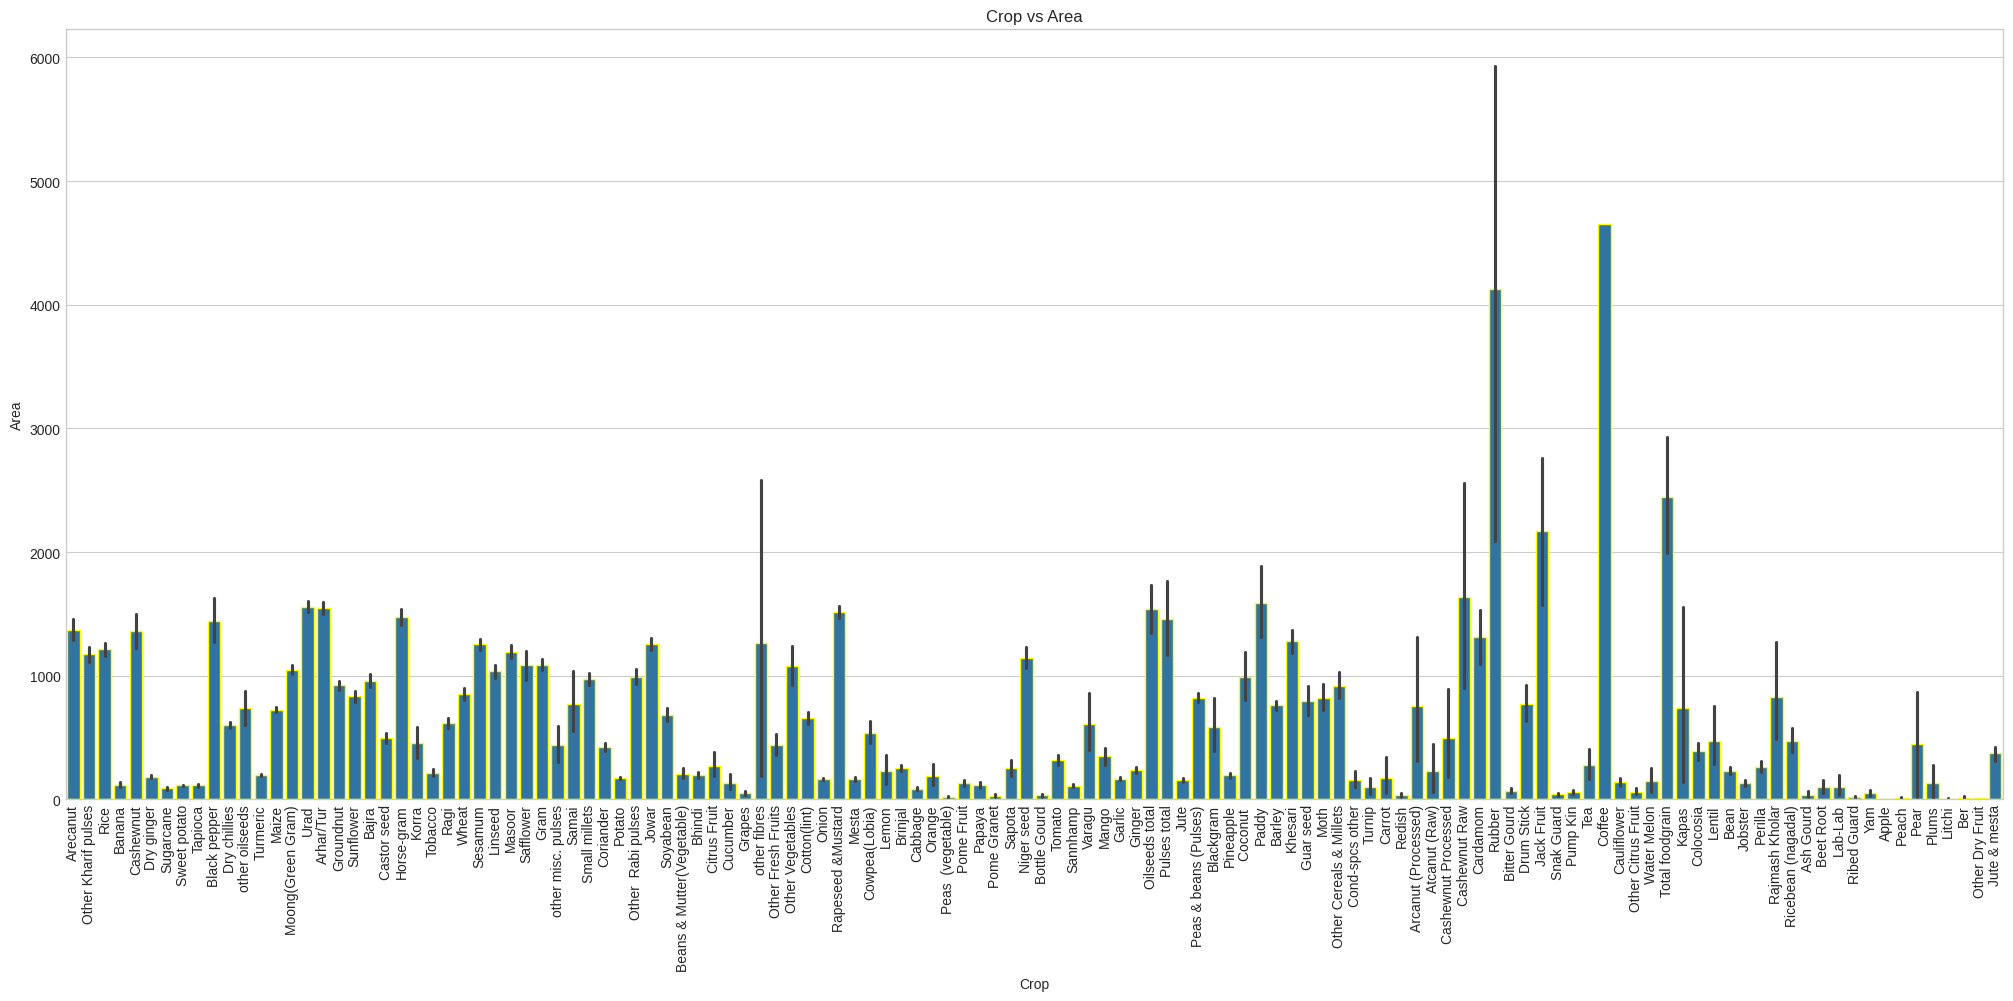

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = crop2, x = "Crop", y = "Area", edgecolor = "yellow")
plt.title("Crop vs Area")
plt.xticks(rotation = 90)
plt.show()

# **Production v/s Area**

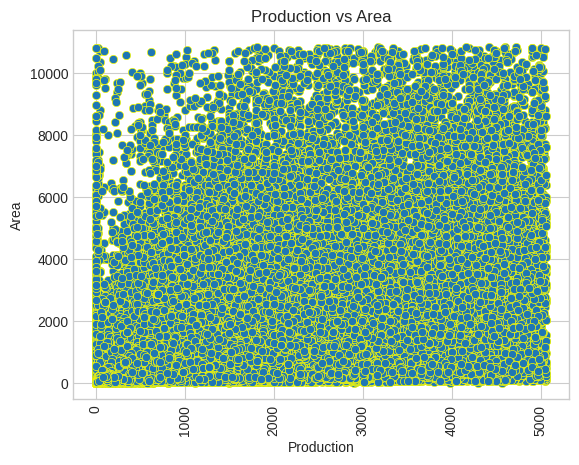

In [ ]:

sns.scatterplot(data = crop2, x = "Production", y = "Area", edgecolor = "yellow")
plt.title("Production vs Area")
plt.xticks(rotation = 90)
plt.show()



*   production is correlated with agricultural area.



# **Season-wise Yearly Production**

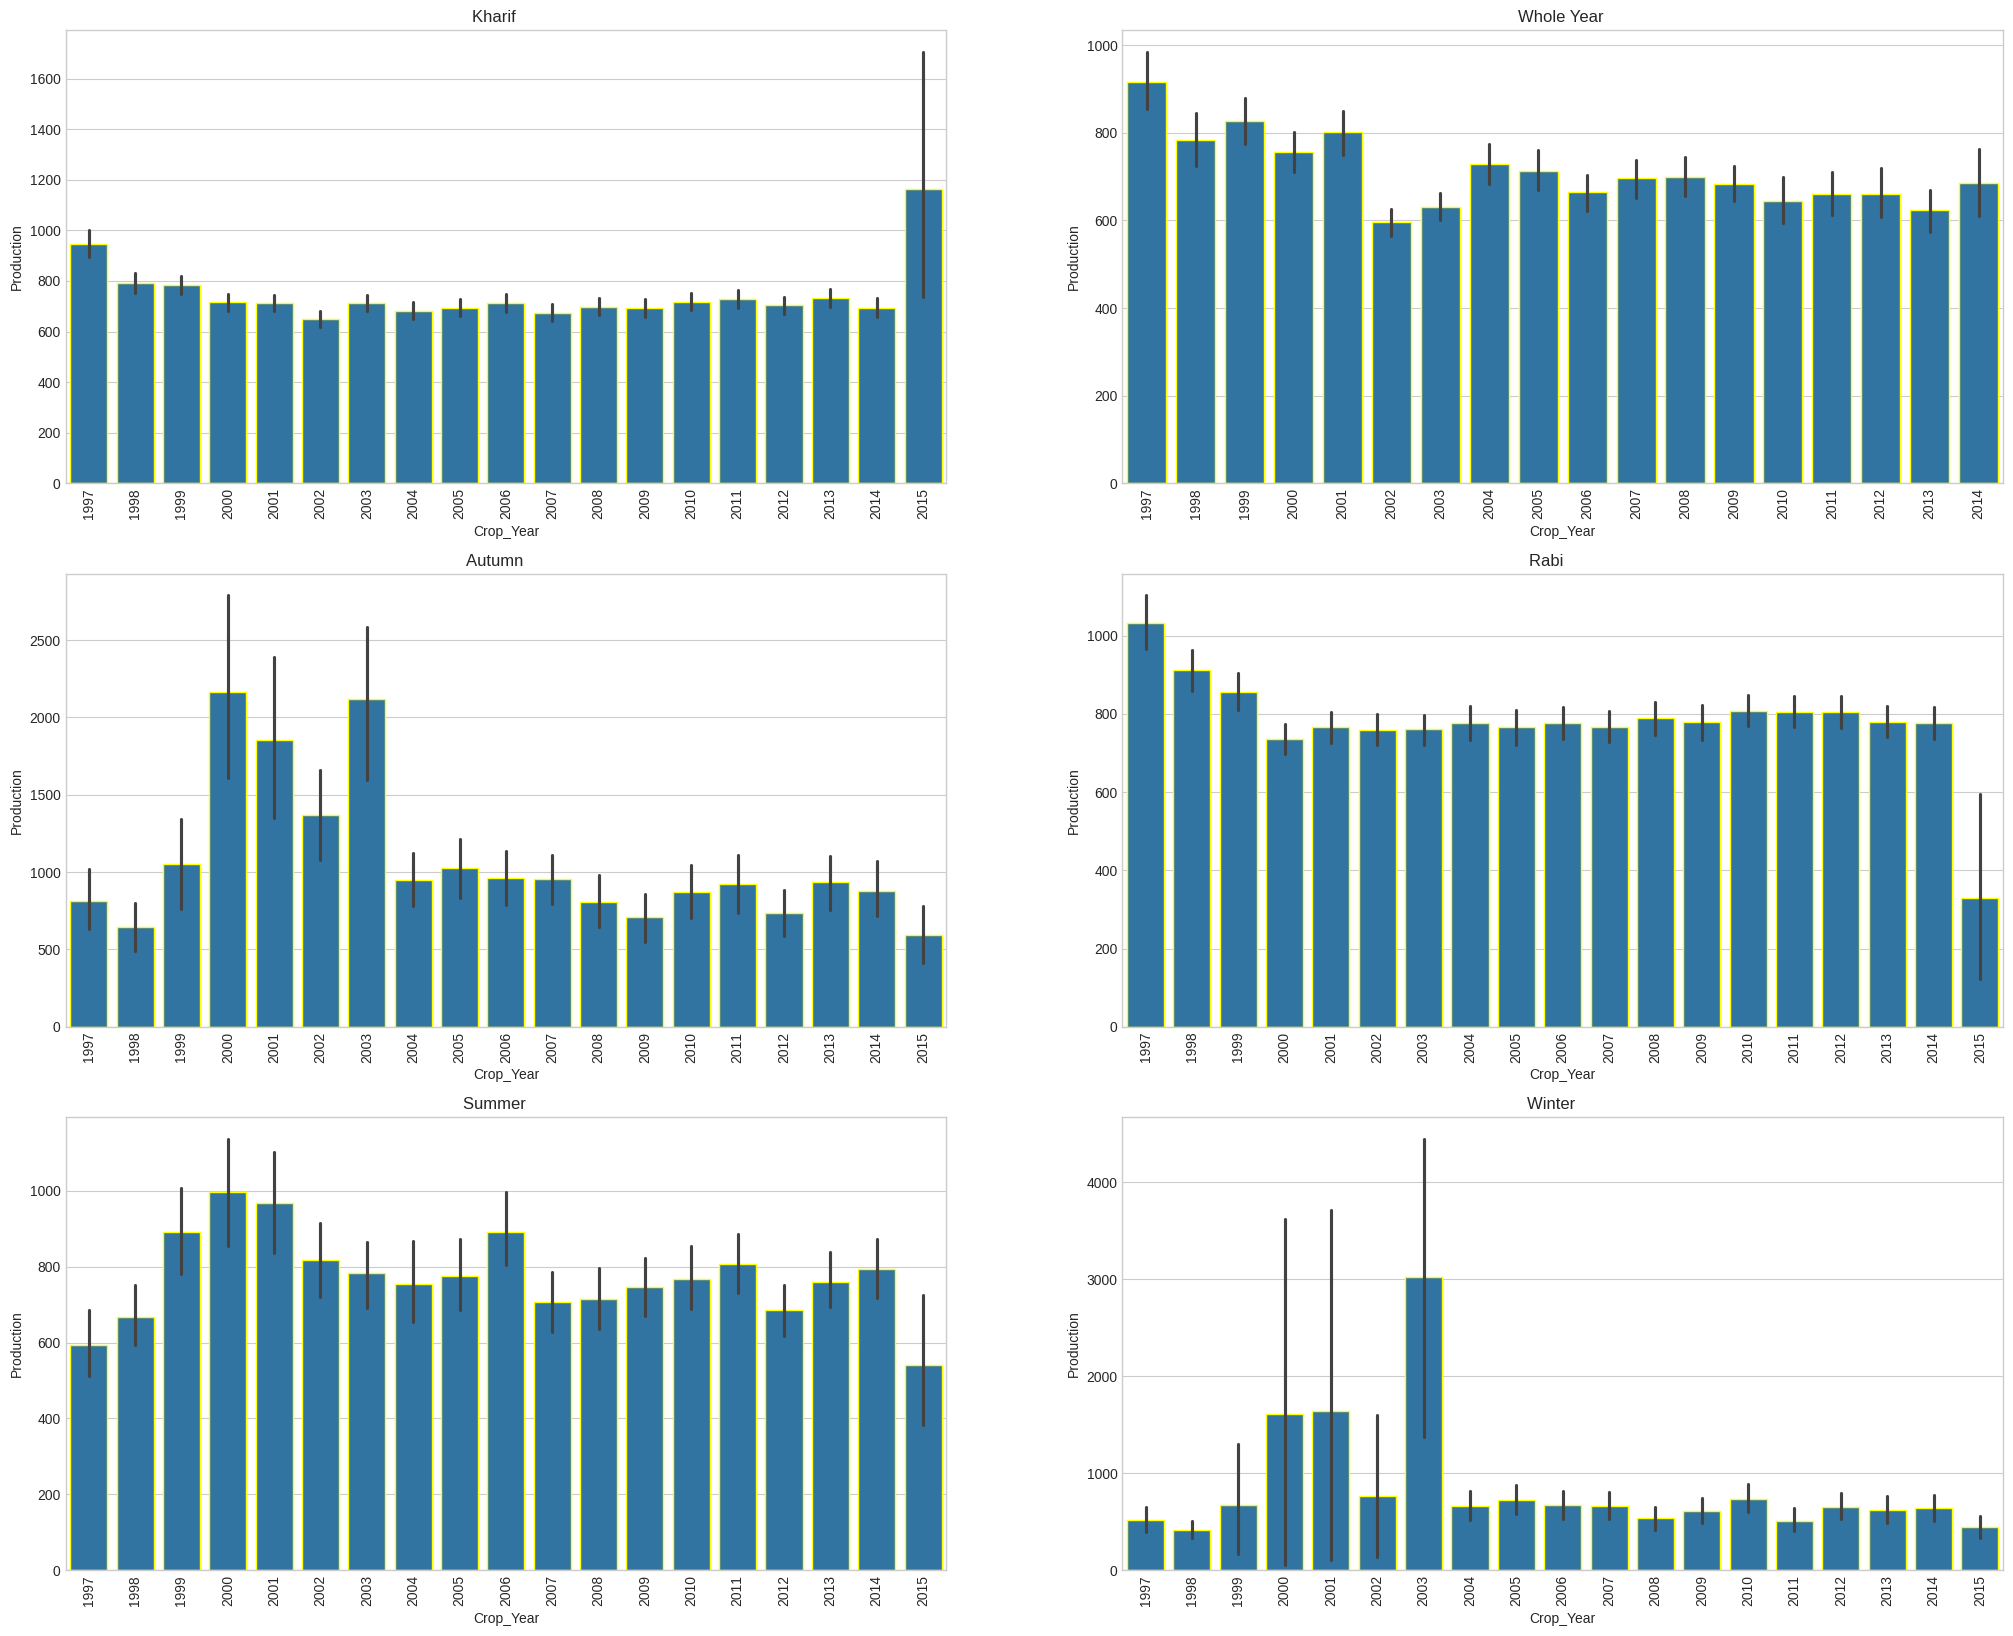

In [ ]:
num=1
plt.figure(figsize = (25,20))
for i in crop2.Season.unique():
  plt.subplot(3,2,num)
  sns.barplot(data = crop2[crop2["Season"] == i], x = "Crop_Year", y = "Production", edgecolor = "yellow")
  plt.xticks(rotation = 90)
  plt.title(i)
  num = num + 1
plt.show()




*   During kharif season the in 2015 there was maximum peoduction.
*   winter crops have very low production of year 2001 & 2003 , similar trend shown by Autumn.




# **Season-wise v/s Area**

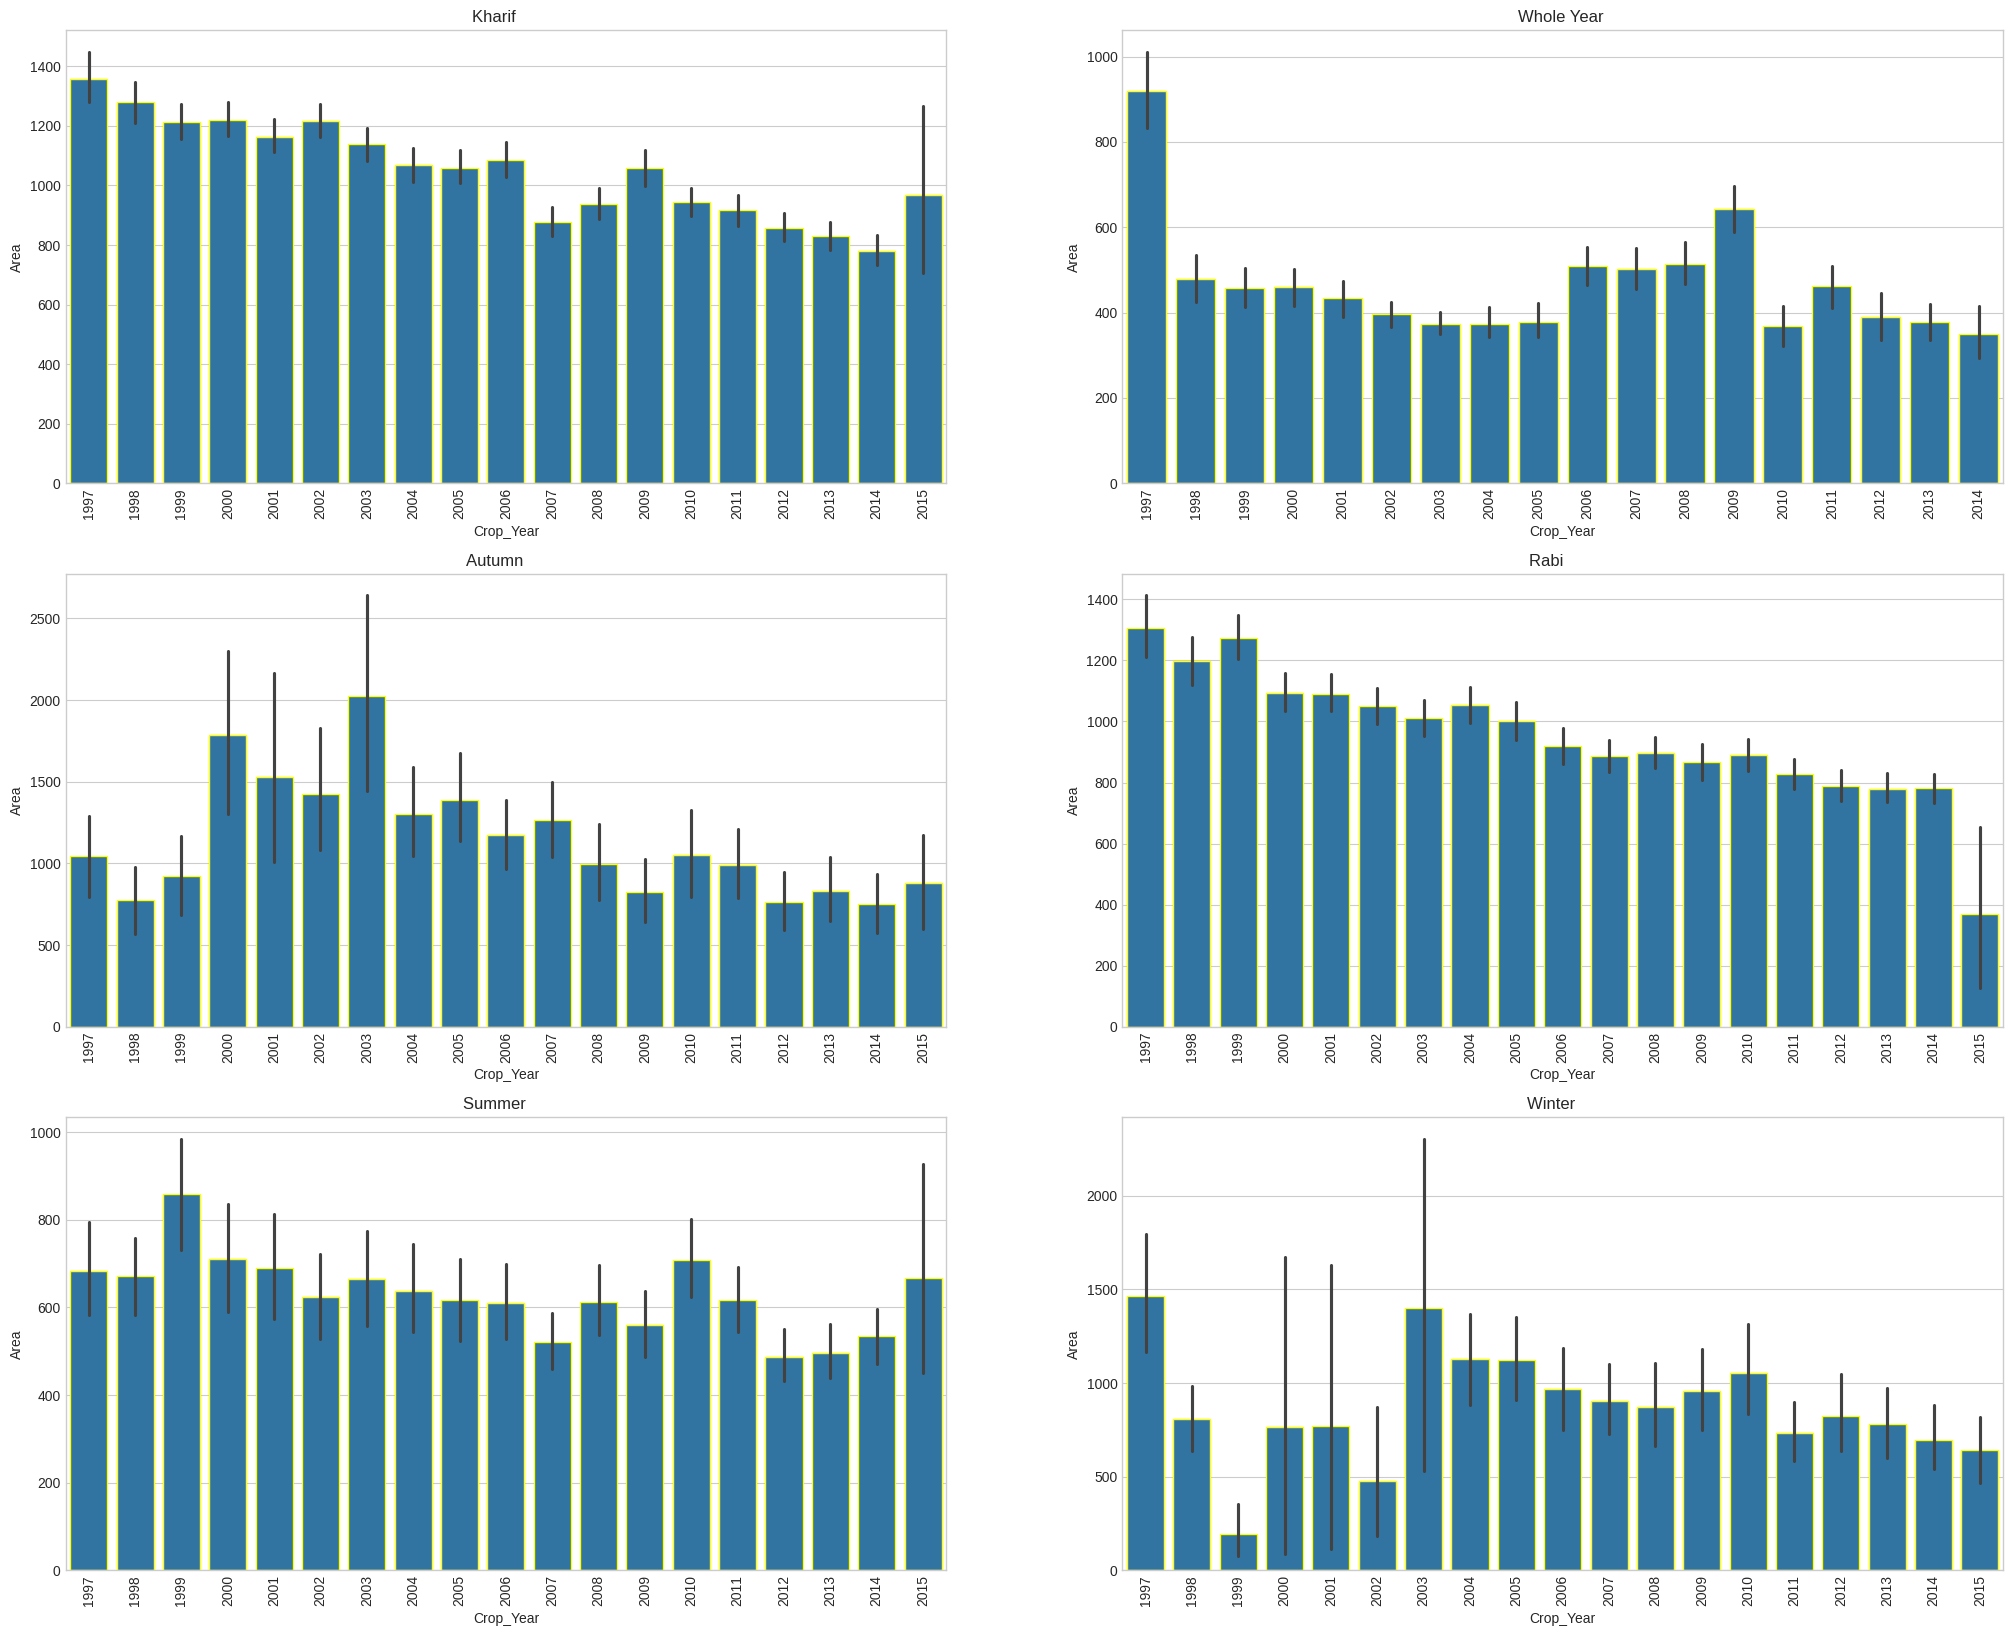

In [ ]:
num=1
plt.figure(figsize = (25,20))
for i in crop2.Season.unique():
  plt.subplot(3,2,num)
  sns.barplot(data = crop2[crop2["Season"] == i], x = "Crop_Year", y = "Area", edgecolor = "yellow")
  plt.xticks(rotation = 90)
  plt.title(i)
  num = num + 1
plt.show()



*   Rabi crops agricultural land is decreasing by the years.
*   Similar but slow tred is seen in Autumn season & kharif season.



# **Summary**
The Datasel given was about the Production of Crops from the year 1997 to 2015
The Traget variable was the "Production" colums.

# **Univate Analysis:**
The agricultural area is Maximum in "Autumn"

The States Punjab, Sikkim, Gujarat has maximumn number of Agricutural land among all the states

Chandigarh has lowest number of agricultural land.

The District Bilaspur has maximum count, l,e it has maximum crop production.

Namsai has lowest count, le it has lowest crop production.

Moong(Green Grams) has maximum count.

Rubber has lowest count.

The data of Production and Arae highly skweed

This is maybe beacuse that every state has varying number of agricultural land.

Every State produce diffrent crops in abundance.

The Procudtion is maximum in Autumn Season.

# **Bivariate Analysis**
During Kharif season the in 2015 there was maximum production

Winter crops have very low production exacey of year 2001 and 2003 and similar trend is shown by Auttum.

Whole year crop does not have vast diffrence.

Rabi crops agricural land is decreasing by the years

Similar but slow tred is seen in Autumn Season and Kharif Season.

Production is corretated with agricultural area.

The Production and Quality of Land for the agricultural is afftected by the year

Hence we need to take necessary measure to ensure that the production increase by the year.


